<!--NAVIGATION-->
<[Week-04-03-Data-Preprocessing-03](Week-04-03-Data-Preprocessing-03.ipynb) | [Contents](Index.ipynb) | [Week-05-02-Data-Preprocessing-05](Week-05-02-Data-Preprocessing-05-(Categorical-Data).ipynb)  >


# Data Preprocessing 04

Discussion on this week is still related to Data Preprocessing on some particular data such as:
- Time Series
- Processing Categorical Data
- Text - String


### This section

You will learn about how to deal Time Series data. 
- First, it discusses ```datetime``` and ```dateutil```. 
- Second, it explaines the Pandas Time Series Data Structures. 
- Finally, it addresses the analysis on time series data with two examples; bicycle and stock data. 


### Preparation

------
Dataset
- FremontBridge.csv
- Stock data from the library pandasdatareader

# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

In this section, we will introduce how to work with each of these types of date/time data in Pandas.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.
While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python. Note that there are some datetime packages in Python. 

- Native Python
- Datetime in NumPy
- Datetime in Pandas

### Native Python dates and times: ``datetime`` and ``dateutil``

Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [3]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [4]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of ``datetime`` and ``dateutil`` is in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.

NumPy Python has a native function for datetime.

### Typed arrays of times: NumPy's ``datetime64``

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

In [5]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [6]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy ``datetime64`` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's ``datetime`` objects, especially as arrays get large.

One detail of the ``datetime64`` and ``timedelta64`` objects is that they are built on a *fundamental time unit*.
Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Here is a minute-based datetime:

In [8]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the ``datetime64`` data type addresses some of the deficiencies of the built-in Python ``datetime`` type, it lacks many of the convenient methods and functions provided by ``datetime`` and especially ``dateutil``.
More information can be found in [NumPy's datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html).

### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.

From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.


In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [13]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [14]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [15]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section introduces the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.

While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.

Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

In [16]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any ``DatetimeIndex`` can be converted to a ``PeriodIndex`` with the ``to_period()`` function with the addition of a frequency code; here we'll use ``'D'`` to indicate daily frequency:

In [17]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [18]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

All of these require an understanding of Pandas frequency codes, which we'll summarize in the next section.

## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

In [19]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [20]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
#data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column:

In [21]:
data.columns = ['East', 'West']
data['Total'] = data.eval('East + West')

In [22]:
data.head()

,East,West,Total
Date,,,
2015-02-24 02:00:00,3.0,3.0,6.0
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2016-02-15 00:00:00,3.0,3.0,6.0
2019-01-01 02:00:00,1.0,11.0,12.0


Now let's take a look at the summary statistics for this data:

In [23]:
data.dropna().describe()

,East,West,Total
count,61287.000000,61287.000000,61287.000000
mean,52.894790,61.444874,114.339664
std,67.815951,89.875981,145.211368
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


In [ ]:
#By looking at the data you just downloaded, it provided the column "Total"
data1 = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [ ]:
data1.head()

In [33]:
data1.columns = ['Total','West', 'East']

In [34]:
data1.dropna().describe()

,Total,West,East
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn; seaborn.set()

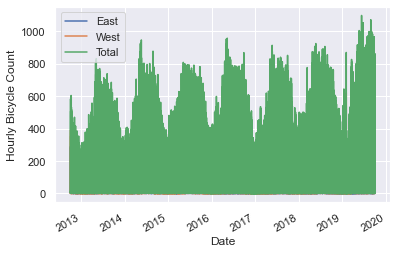

In [27]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

## Resample

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week:

In [28]:
data.resample('D').sum()

,East,West,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0
...,...,...,...
2019-09-26,1494.0,2636.0,4130.0
2019-09-27,1199.0,2214.0,3413.0
2019-09-28,848.0,1011.0,1859.0


In [29]:
data.resample('W').sum()

,East,West,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0
...,...,...,...
2019-09-08,10932.0,17622.0,28554.0
2019-09-15,9489.0,16344.0,25833.0
2019-09-22,9096.0,16103.0,25199.0


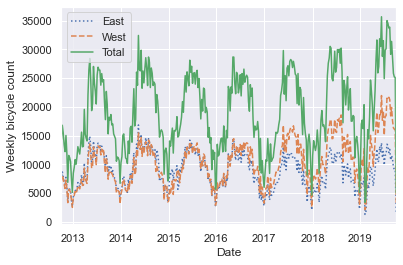

In [30]:
weekly = data.resample('W').sum() #1 year consists of 52 weeks
weekly.plot(style=[':', '--', '-']) #separate the plot from the three columns
plt.ylabel('Weekly bicycle count');
#Explain!
#West bridge seems higher on the bike numbers than the East bridge

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

In [31]:
data.resample('D').sum()

,East,West,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0
...,...,...,...
2019-09-26,1494.0,2636.0,4130.0
2019-09-27,1199.0,2214.0,3413.0
2019-09-28,848.0,1011.0,1859.0


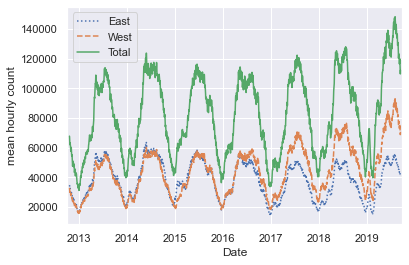

In [32]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

### Digging into the data

#### Using data.index

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in the section Aggregation:

In [33]:
data.groupby(data.index.time).mean()

,East,West,Total
00:00:00,5.054816,6.795223,11.850039
01:00:00,2.825764,3.447925,6.273688
02:00:00,2.003923,2.125539,4.129463
03:00:00,1.567737,1.469851,3.037588
04:00:00,3.551292,3.142913,6.694205
05:00:00,16.352388,10.074393,26.426782
06:00:00,56.413469,36.033673,92.447142
07:00:00,147.527408,85.638998,233.166406
08:00:00,198.488254,131.081441,329.569695
09:00:00,106.688210,85.665492,192.353702


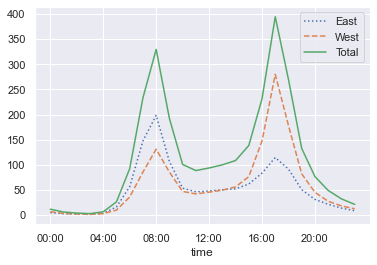

In [34]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) # 4hours, 60 minutes, 60 seconds, put 6 range
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.

This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

In [35]:
data.groupby(data.index.dayofweek).mean()

,East,West,Total
Date,,,
0,60.330251,73.444064,133.774315
1,64.858370,78.187199,143.045569
2,64.293493,77.515639,141.809132
3,61.463699,73.250342,134.714041
4,55.307719,66.122859,121.430578
5,32.577055,31.839498,64.416553
6,31.456768,29.787207,61.243975


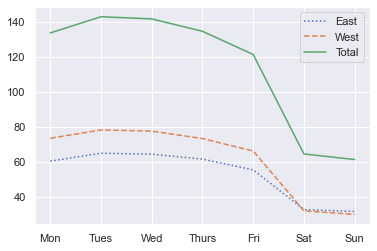

In [36]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [37]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') #if it is true = Weekday, else 'Weekend'
by_time = data.groupby([weekend, data.index.time]).mean()

In [38]:
by_time

East        West       Total
Weekday 00:00:00    4.289474    5.638158    9.927632
        01:00:00    2.231360    2.682566    4.913925
        02:00:00    1.633224    1.652412    3.285636
        03:00:00    1.459430    1.341009    2.800439
        04:00:00    4.304276    3.456140    7.760417
        05:00:00   21.259320   12.713268   33.972588
        06:00:00   75.686404   46.796053  122.482456
        07:00:00  199.649123  113.598136  313.247259
        08:00:00  264.989035  171.995614  436.984649
        09:00:00  131.913878  104.257268  236.171146
        10:00:00   53.517828   47.388371  100.906199
        11:00:00   39.803620   36.080636   75.884257
        12:00:00   39.780033   38.393308   78.173341
        13:00:00   41.923246   42.398026   84.321272
        14:00:00   44.238487   51.272478   95.510965
        15:00:00   58.081689   80.104167  138.185855
        16:00:00   90.699561  181.498355  272.197917
        17:00:00  138.552083  370.560855  509.112939
        18:00:00  111.139254  232.707237  343.846491
        19:00:00   59.467105  103.350329  162.817434
        20:00:00   35.828399   54.611294   90.439693
        21:00:00   24.645285   32.141996   56.787281
        22:00:00   15.536732   20.751645   36.288377
        23:00:00    9.354167   13.413925   22.768092
Weekend 00:00:00    6.967123    9.686301   16.653425
        01:00:00    4.310959    5.360274    9.671233
        02:00:00    2.936552    3.315862    6.252414
        03:00:00    1.838356    1.791781    3.630137
        04:00:00    1.669863    2.360274    4.030137
        05:00:00    4.091781    3.480822    7.572603
        06:00:00    8.257534    9.142466   17.400000
        07:00:00   17.294521   15.779452   33.073973
        08:00:00   32.327397   28.852055   61.179452
        09:00:00   43.693151   39.236986   82.930137
        10:00:00   53.871233   46.616438  100.487671
        11:00:00   63.030137   57.606849  120.636986
        12:00:00   68.989041   63.894521  132.883562
        13:00:00   71.606849   67.784932  139.391781
        14:00:00   72.678082   68.547945  141.226027
        15:00:00   71.323288   67.806849  139.130137
        16:00:00   65.854795   63.156164  129.010959
        17:00:00   54.650685   53.521918  108.172603
        18:00:00   42.812329   41.430137   84.242466
        19:00:00   28.308219   28.831507   57.139726
        20:00:00   19.997260   22.063014   42.060274
        21:00:00   14.012329   15.993151   30.005479
        22:00:00   10.250685   12.505479   22.756164
        23:00:00    7.438356   10.573973   18.012329

Now we'll use some of the Matplotlib tools (using subplots) to plot two panels side by side:

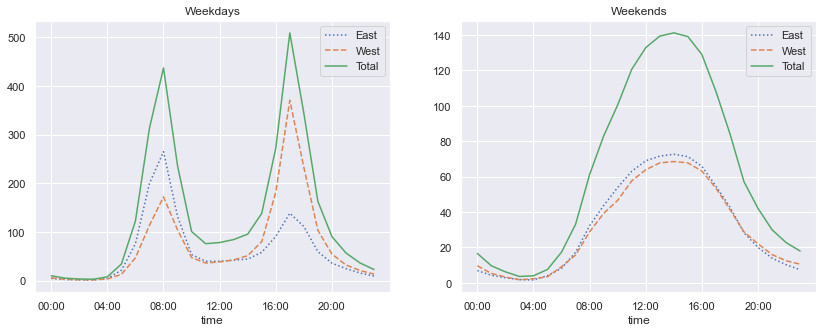

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-']) #the first graph for weekdays
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']); #the second graph for weekdends

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.

## Resampling & Rolling Windows (Self Study)

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.
For example, the accompanying ``pandas-datareader`` package (installable via ``conda install pandas-datareader`` or ``pip install pandas-datareader``), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others.
Here we will load Google's closing price history:

In [42]:
!pip install pandas-datareader

In [43]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()
#High : highest price on that day
#Low : lowest price on that day
#Open: price in the opening time
#Close: price in the closing time
#volume: 
#adj close: 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


For simplicity, we'll use just the closing price:

In [44]:
goog = goog['Close']

We can visualize this using the ``plot()`` method:

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

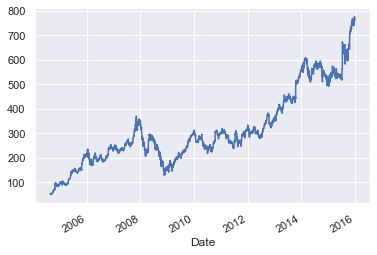

In [46]:
goog.plot();
#Explain: 
#in 2009, the stock price was decreasing and it increases till the year of 2016

### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

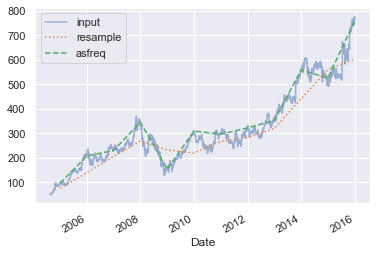

In [47]:
goog.plot(alpha=0.5, style='-') #alpha : transparency
goog.resample('BA').mean().plot(style=':') #resample
goog.asfreq('BA').plot(style='--'); #frequency 365 -....
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

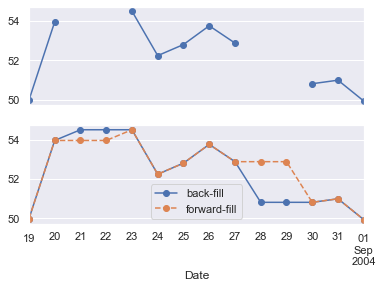

In [48]:
fig, ax = plt.subplots(2, sharex=True) # make two rows
data = goog.iloc[:10] # i am going to use 10 data

data.asfreq('D').plot(ax=ax[0], marker='o') #the first graph (1st row)

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

## Summary

This section addresses:
- Time Series (index)
- Time Series (Resample & Rolling) on Bike Data
- Time Series (Resample & Rolling) on Stock Data